<font size="5"><b>Lecture 04: Morphology and Segmentation (exercises)</b></font>

## EX 1: histogram-based segmentation

<div class="alert alert-success">
    <b>Turn the sky red!</b><br>
    <ol>
        <li> Crop a portion of the sky and analyze the histograms of the three bands.</li>
        <u>Hint</u>: use matplotlib's pyplot <a href="https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.hist.html" target="_blank">hist()</a> function to create the histogram.
        <li> Create a mask to isolate the sky pixels.<br><u>Hint</u>: use numpy's <a href="https://numpy.org/doc/stable/reference/generated/numpy.where.html" target="_blank">where()</a> function with as many thresholds wanted, and assign 1 where conditions are True, 0 where conditions are false. Plot the mask with a color bar to see if you are happy with the isolated pixels.<br>
        <u>Hint</u>: try with a threshold on the blue band only: is this satisfying? Try with multiple thresholds (EX: mask = np.where((R < 150) & (G > 100) & (B > 200), 1, 0)): is this better?<br></li>
         <li> Create new bands R_f, G_f and B_f, altering the pixel color to red (R=255, G=0, B=0) where mask=1.<br>Use numpy's where() function to create these new bands.</li>
         <li> Plot the resulting image. Is your sky red?</li>
    </ol>
</div>

In [1]:
from skimage import io

img = io.imread('images/Popocatepetl_HD.jpg')

In [2]:
# --- unpack channels
R, G, B = img[:, :, 0], img[:, :, 1], img[:, :, 2]

In [5]:
# -- crop sky and analyze band histograms
import matplotlib.pyplot as plt

ymin, ymax = 0, 400
xmin, xmax = 0, 500

sky = img[ymin:ymax, xmin:xmax, :]

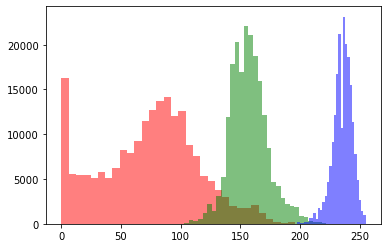

In [4]:
plt.hist(sky[:,:,0].ravel(), bins=32, color='r', alpha=.5);
plt.hist(sky[:,:,1].ravel(), bins=32, color='g', alpha=.5);
plt.hist(sky[:,:,2].ravel(), bins=32, color='b', alpha=.5);

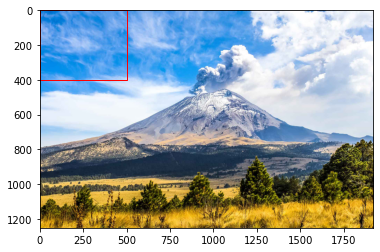

In [6]:
import matplotlib.patches as patches

plt.figure()
plt.imshow(img)
xy = (xmin, ymin)
w = xmax-xmin
h = ymax-ymin
rect = patches.Rectangle(xy, w, h, linewidth=1, edgecolor='r', facecolor='none')
ax = plt.gca()
ax.add_patch(rect)

In [9]:
# --- create mask based on thresholds in the 3 bands
import numpy as np

mask = np.where(B>200, 1, 0) #>> assign 1 where conditions true, 0 where false
mask = np.where((R<150) & (G>100) & (G<200) & (B>200), 1, 0) #>> assign 1 where conditions true, 0 where false

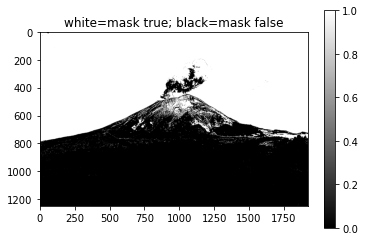

In [8]:
plt.figure()
plt.imshow(mask, cmap='gray')
plt.title('white=mask true; black=mask false')
plt.colorbar()

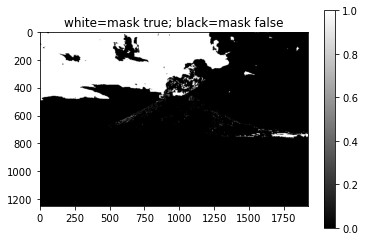

In [10]:
plt.figure()
plt.imshow(mask, cmap='gray')
plt.title('white=mask true; black=mask false')
plt.colorbar()

In [11]:
# --- alter pixels where mask=1 to red color (R=255, G=0, B=0), leave the other pixels where mask=0 unchanged
R_f = np.where(mask==1, 255, R)
G_f = np.where(mask==1, 0, G)
B_f = np.where(mask==1, 0, B)

RGB_f = np.dstack((R_f, G_f, B_f))

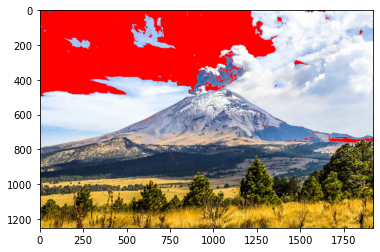

In [12]:
plt.imshow(RGB_f)

# EX 2: analyze agricultural fields

## 2.1. open image

<div class="alert alert-success">
The image is a satellite image of agricultural fields in California, Meridian County, acquired on 8 July 2016 (Source: <a href="https://www.gettyimages.es/fotos/digitalglobe-meridian-county?family=editorial&assettype=image&sort=mostpopular&phrase=digitalglobe%20meridian%20county" target="_blank">DigitalGlobe/Getty Images</a>).<br>

<br>
Open the image "fields.jpg" using <a href="https://scikit-image.org/docs/stable/api/skimage.io.html#skimage.io.imread" target="_blank">skimage.io.imread</a>.<br>
</div>

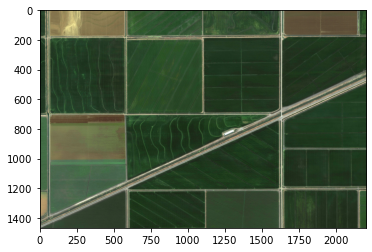

In [10]:
from skimage import io
import matplotlib.pyplot as plt

# - open and plot
img = io.imread('images/fields.jpg')
plt.imshow(img)

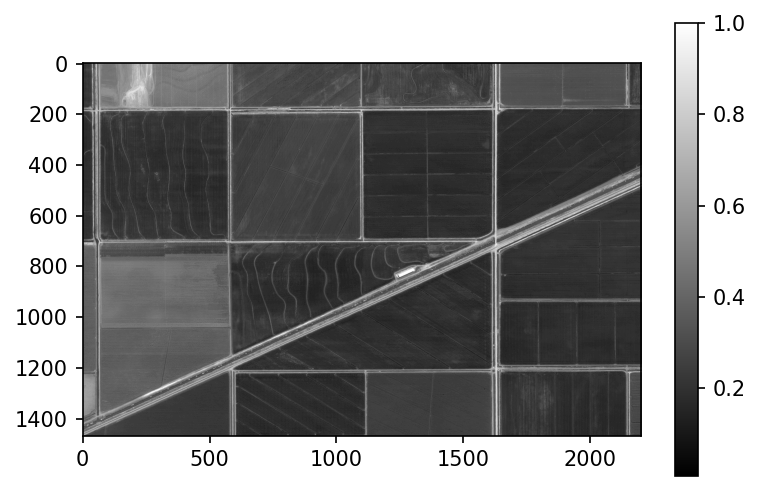

In [11]:
# - convert to grayscale
from skimage import color
img_g = color.rgb2gray(img)

plt.figure(dpi=150)
plt.imshow(img_g, cmap='gray')
plt.colorbar()

## 2.2. segment fields using histogram thresholding

<div class="alert alert-success">
The goal of this section is to segment the fields from the roads: play around with color thresholds to try to isolate the fields from the roads (binarize image).<br>
Try setting threshold values manually.<br>
<br>
<u>Tip</u>: manipulating the image converted to grayscale might be easier than the RGB image.<br>
<u>Tip</u>: try filtering the image using a low-pass gaussian filter (<a href="https://scikit-image.org/docs/stable/api/skimage.filters.html#skimage.filters.gaussian" target="_blank">skimage.filters.gaussian</a>) prior to binarization.
<!--Try <a href="https://scikit-image.org/docs/stable/api/skimage.filters.html#skimage.filters.threshold_otsu" target="_blank">Otsu's threshold</a>. Can you reach satisfying results? -->
</div>

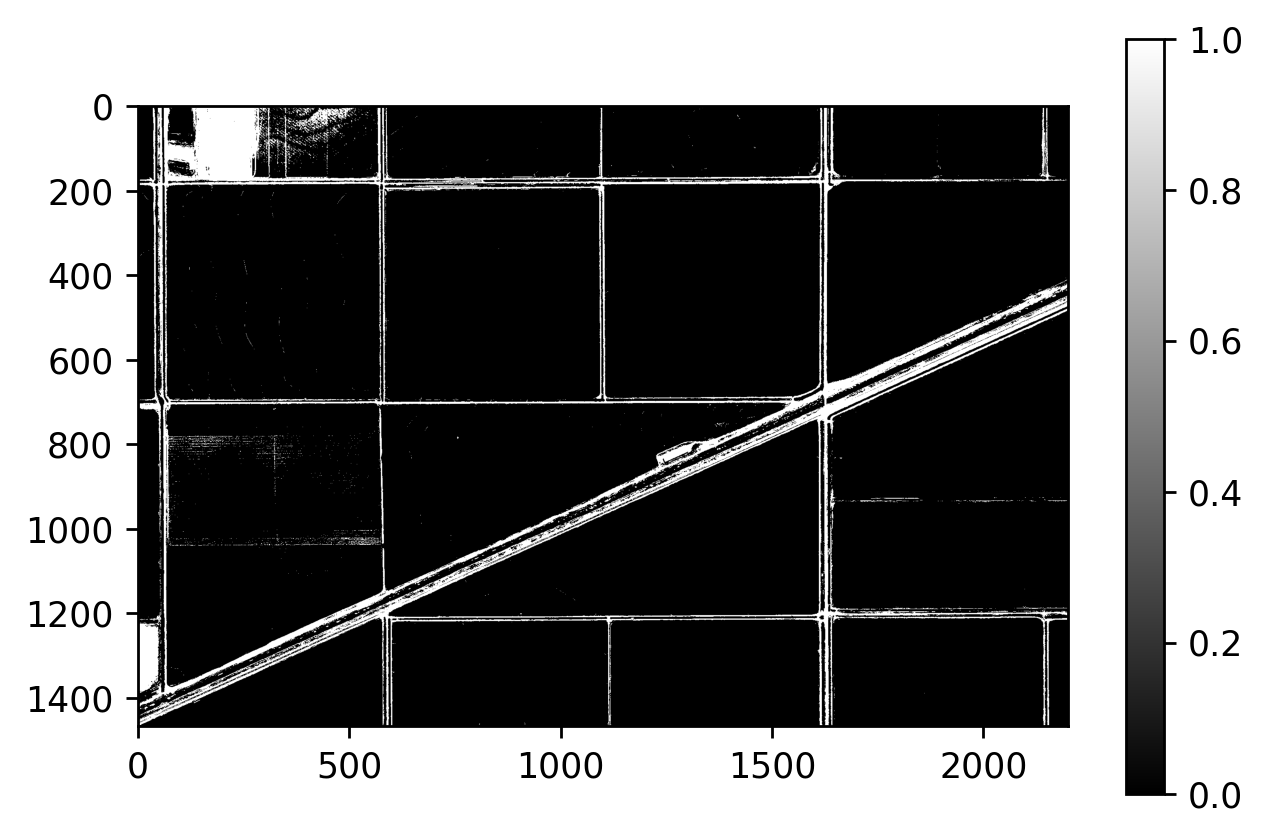

In [12]:
# --- try global threshold (manual)
import numpy as np
# mask = np.where(img_g > 0.5, 1, 0)
mask = img_g > 0.5

plt.figure(dpi=250)
plt.imshow(mask, cmap='gray')
plt.colorbar()

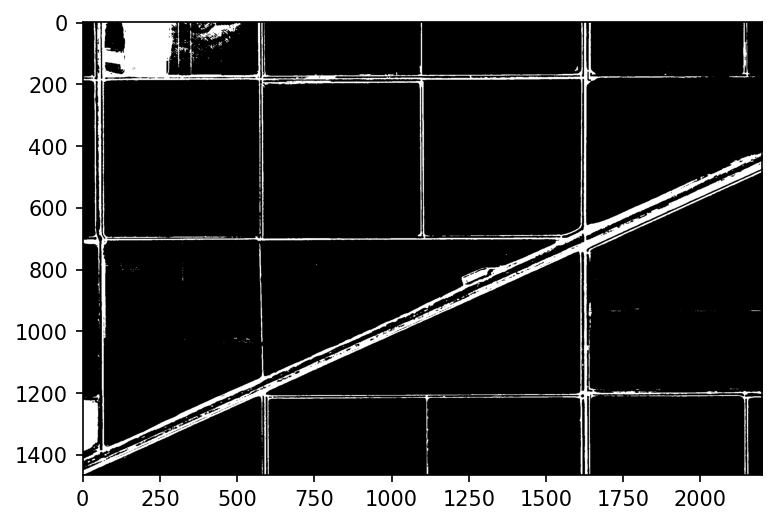

In [13]:
# --- try gaussian filter before manual threshold
from skimage import filters
img_g_filt = filters.gaussian(img_g, sigma=1)

mask = img_g_filt > 0.5

plt.figure(dpi=150)
plt.imshow(mask, cmap='gray')

### 2.3. clean image using mathematical morphology

<div class="alert alert-success">
    Mathematical morphology can be used used "clean" your image, by removing small undesired regions.<br>
    Explore scikit-image's <a href="https://scikit-image.org/docs/dev/api/skimage.morphology.html" target="_blank">morphology</a> module to find a function that suits your needs.<br>
    <br>
    <u>Tip</u>: try using "dilatation" operation.
</div>

In [14]:
from skimage import morphology


# - BASIC morphological operations: DILATION & EROSION
footprint = morphology.square(11)
footprint = morphology.rectangle(nrows=11, ncols=51)
# footprint = morphology.square(21)
# #footprint = morphology.diamond(15)
mask_f = morphology.dilation(mask, footprint=footprint)


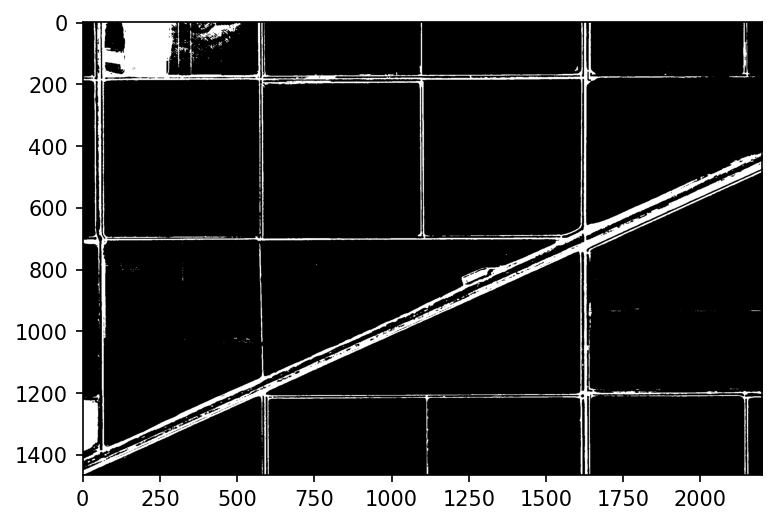

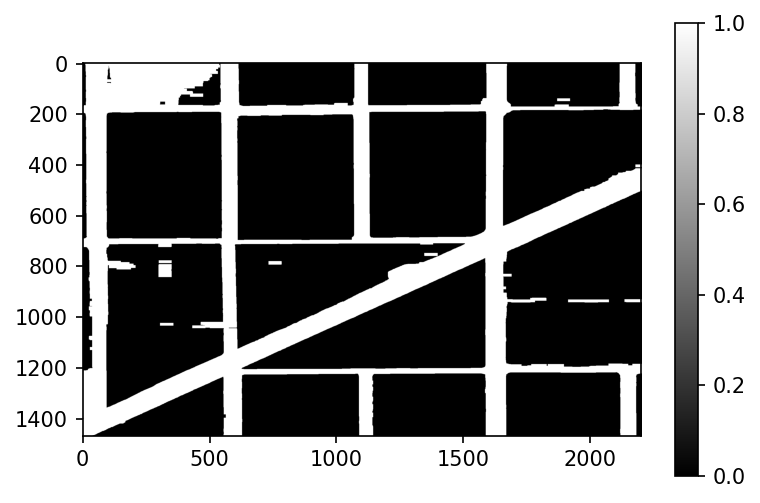

In [15]:
plt.figure(dpi=150)
plt.imshow(mask, cmap='gray')

plt.figure(dpi=150)
plt.imshow(mask_f, cmap='gray')
plt.colorbar()

### 2.4. label isolated image regions

<div class="alert alert-success">
    Once you are satisfied with your binarized image, you are ready to "label" the connected regions.<br>
    You can use scikit-image's <a href="https://scikit-image.org/docs/dev/api/skimage.measure.html#skimage.measure.label" target="_blank">measure.label()</a> function. (or <a href="https://docs.scipy.org/doc/scipy/reference/generated/scipy.ndimage.label.html" target="_blank">scipy.ndimage.label()</a>).<br>
    <br>
    <u>Tip</u>: these functions will label pixels different than the background, which by default is defined as pixels with value 0. So adjust the background parameter to your image (or adapt your image to the function ;)
</div>

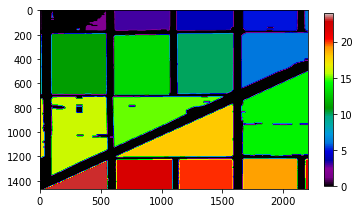

In [16]:
# --- label
from skimage import measure

# - NB: set background (=> elements not to label) to roads which have values=1
img_labels = measure.label(mask_f, background=1) 

plt.imshow(img_labels, cmap=plt.cm.nipy_spectral) # tab20, nipy_spectral, prism
plt.colorbar(shrink=.8)


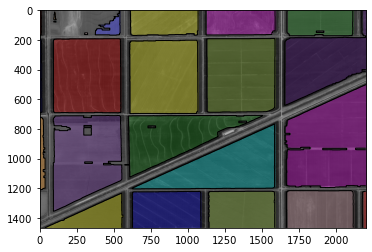

In [17]:
from skimage import color

# - convert labels to rgb colors, overlayed on original image
img_labels_rgb = color.label2rgb(img_labels, image=img_g, bg_label=0)
plt.imshow(img_labels_rgb)

# - plot labels contour
plt.contour(img_labels, [.5], linewidths=1, colors='k')

### 2.5. analyze fields

<div class="alert alert-success">
    Scikit-image provides a convenient <a href="https://scikit-image.org/docs/dev/api/skimage.measure.html#skimage.measure.regionprops" target="_blank">measure.regionprops()</a> function to analyze basic parameters from the labeled image components.<br>
    <br>
    <b>1.</b> Use the function to get the fields's centroids, and plot them on top of your labeled image.
</div>

In [18]:
# --- measure properties
regions = measure.regionprops(img_labels)

In [19]:
regions

In [20]:
p = regions[0]
type(p)

skimage.measure._regionprops.RegionProperties

In [21]:
list(p)

['area',
 'area_bbox',
 'area_convex',
 'area_filled',
 'axis_major_length',
 'axis_minor_length',
 'bbox',
 'centroid',
 'centroid_local',
 'coords',
 'eccentricity',
 'equivalent_diameter_area',
 'euler_number',
 'extent',
 'feret_diameter_max',
 'image',
 'image_convex',
 'image_filled',
 'inertia_tensor',
 'inertia_tensor_eigvals',
 'label',
 'moments',
 'moments_central',
 'moments_hu',
 'moments_normalized',
 'orientation',
 'perimeter',
 'perimeter_crofton',
 'slice',
 'solidity']

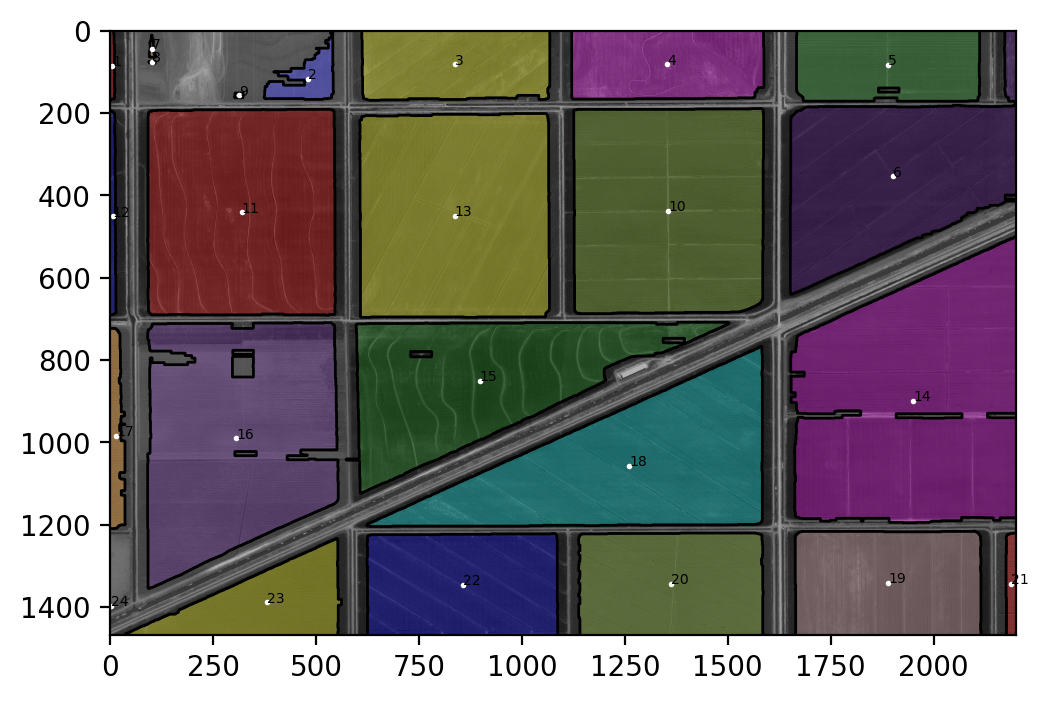

In [22]:
# --- plot the plate centroids and number

plt.figure(dpi=200)
plt.imshow(img_labels_rgb)
plt.contour(img_labels, [.5], linewidths=1, colors='k')

for props in regions:
    y0, x0 = props.centroid

    plt.plot(x0, y0, 'w.', markersize=2)
    plt.text(x0, y0, props.label, fontsize=5)

<div class="alert alert-success">
    <b>2.</b> Use scikit-image's <a href="https://scikit-image.org/docs/dev/api/skimage.measure.html#skimage.measure.regionprops_table" target="_blank">measure.regionprops_table()</a> function to return the label properties as a pandas table.<br> 
    Plot a histogram of the plate's area.
</div>

In [32]:
props = measure.regionprops_table(img_labels, 
                                  properties=('area', 'perimeter', 'centroid'))

In [24]:
type(props)

dict

In [33]:
import pandas as pd

df = pd.DataFrame(props)
df

,area,perimeter,centroid-0,centroid-1
0,1822,356.142136,84.892426,4.968167
1,12678,826.189863,116.672819,479.551822
2,74813,1261.254834,81.756179,837.961972
3,76312,1252.970563,81.537452,1352.195159
4,74537,1356.426407,83.731449,1889.909186
5,187117,2328.517857,353.413089,1900.770972
6,389,118.591883,44.521851,101.465296
7,48,33.414214,76.125000,102.375000
8,212,57.414214,157.056604,312.858491
9,225277,1886.610173,436.702801,1355.693351


In [34]:
areas_campos = df['area']

In [38]:
pixel_size_m = 2 
pixel_area_m2 = (pixel_size_m)**2
df['area [m2]'] = df['area'] * pixel_area_m2
# df

In [37]:
df.to_excel('campos_segmentados.xlsx')

## 2.3. segment using "flood fill" algorithm

<div class="alert alert-success">
Try using scikit-image's <a href="https://scikit-image.org/docs/dev/auto_examples/segmentation/plot_floodfill.html#sphx-glr-auto-examples-segmentation-plot-floodfill-py" target="_blank">flood_fill()</a> segmentation algorithm": by selecting a <b>seed point</b> (= pixel where flooding start), you can <b>segment neighboring pixels</b> sharing the same pixel value (within a selected tolerance). The conceptual analogy of this segmentation algorithm is the ‘paint bucket’ tool in many graphic editors)<br>
<br>
<b>1.</b> <u>Segment an agricultural field</u> of your choice: use the gray-scale image, select the seed point in the field, and segment. Play around with the tolerance threshold.
</div>

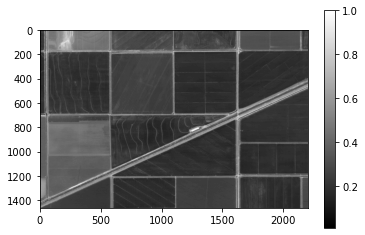

In [39]:
from skimage import io
import matplotlib.pyplot as plt

# - open and plot
img = io.imread('images/fields.jpg')

# - convert to grayscale
from skimage import color
img_g = color.rgb2gray(img)

plt.imshow(img_g, cmap='gray')
plt.colorbar()

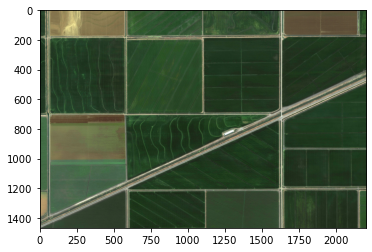

In [40]:
plt.imshow(img)

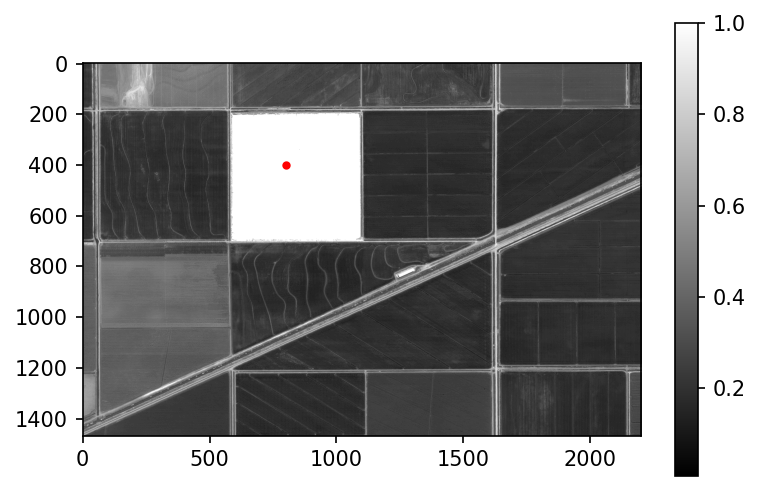

In [47]:
from skimage import segmentation

tolerance = .2 #>> if None, neighboring pixels must have exact value

x, y = 800, 400 # field

img_g_sgm = segmentation.flood_fill(img_g, seed_point=(y, x), new_value=1, tolerance=tolerance)

plt.figure(dpi=150)
plt.imshow(img_g_sgm, cmap='gray')
plt.plot(x, y, color='red', marker='.')
# plt.plot(x, y, 'r.')
plt.colorbar()

<div class="alert alert-success">
    <b>2.</b> <u>Segment the roads</u> by selecting a seed-point positioned on a road pixel.<br>
    <br>Is this working properly? Probably not, due to the fact that the gray-scale image shares too many similar values between roads and fields. Instead, we can use the color image where the dirt roads clearly stand out from the green fields.<br>
     <br>
     However since flood fill operates on single-channel images only, we can transform the image to the HSV (Hue Saturation Value) space and perform the flood-fill segmentation on the Hue band.
</div>

In [48]:
img_hsv = color.rgb2hsv(img)


In [49]:
x, y = 580, 1300 # road
tolerance = .1

hue = img_hsv[:, :, 0]
mask = segmentation.flood_fill(hue, seed_point=(y, x), new_value=1, tolerance=tolerance)

In [54]:
# %matplotlib notebook
%matplotlib inline

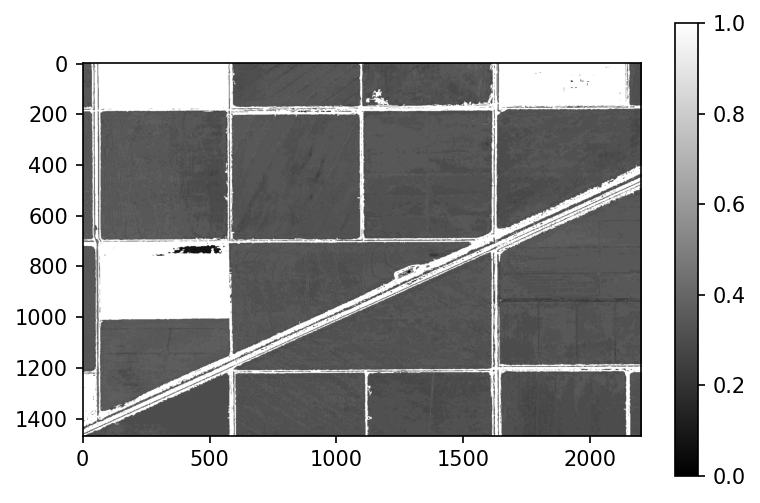

In [58]:
plt.figure(dpi=150)
plt.imshow(mask, cmap='gray')
plt.colorbar()

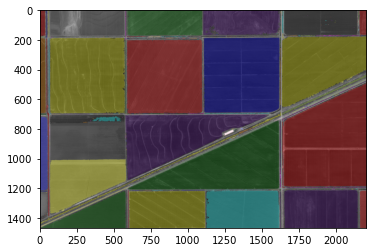

In [59]:
# --- label & plot
from skimage import measure
from skimage import color

img_labels = measure.label(mask, background=1) # background=1 => elements not to label

# Simple plot
# plt.imshow(img_labels, cmap=plt.cm.nipy_spectral) # tab20, nipy_spectral, prism
# plt.colorbar(shrink=.8)

# Fancy plot
img_labels_rgb = color.label2rgb(img_labels, image=img_g, bg_label=0) # Convert labels + background image to rgb
plt.imshow(img_labels_rgb)
# plt.contour(img_labels, [.5], linewidths=1, colors='k') # Add contour to labeled regions